On that project we will make a car price predict application by using "CarPrices" dataset. To do that, we need to seperate dataset into two datasets, one of them for train, second of them is test dataset. Then clear datasets, understand the dataset structure and how features affect price. Finally, we make a prediction function by the help of linear regression.

In [538]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Seperate datasets into two that are test and train.

In [539]:
# Read all data
maindf = pd.read_csv("CarPrices.csv")

# Setting test dataset size 
test_rate = 0.2
test_size = int(test_rate * len(maindf))

# Seperate main dataset
testdf = maindf.iloc[:test_size]
traindf = maindf.iloc[test_size:]

#Check Results
print(f" Main Dataset: {len(maindf)}\n Train:{len(traindf)}\n Test:{len(testdf)}")

#Del main dataset form RAM and other unimportant(anymore) variables 
del maindf, test_rate, test_size

 Main Dataset: 4340
 Train:3472
 Test:868


Then our work is with traindf for a long time

After that we will clear or fill the misisng values

In [540]:
# Checking for missing values on dataset
print(traindf.isna().sum())

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64


As we can see there are no missing values, so we don't need to fill or clear it for now.

Now time to understand this dataset's structure, to do that we can use different approches such as plotting or counting or summing etc.

In [541]:
traindf.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
868,Hyundai i10 Magna 1.1,2008,150000,90000,Petrol,Individual,Manual,Third Owner
869,Hyundai Santro Xing GLS,2009,110000,120000,Petrol,Individual,Manual,First Owner
870,Nissan Sunny Diesel XV,2013,450000,80000,Diesel,Individual,Manual,First Owner
871,Hyundai i20 1.2 Spotz,2017,400000,38000,Petrol,Individual,Manual,Second Owner
872,Hyundai Santro Xing GLS,2009,140000,120000,Petrol,Individual,Manual,First Owner
873,Tata Indigo CR4,2011,130000,90000,Diesel,Individual,Manual,First Owner
874,Maruti Alto 800 LXI,2017,160000,50000,Petrol,Individual,Manual,First Owner
875,Maruti Alto 800 LXI,2016,150000,60000,Petrol,Individual,Manual,First Owner
876,Mahindra XUV500 W8 2WD,2013,500000,100000,Diesel,Individual,Manual,Second Owner
877,Tata Nano Std,2011,40000,19000,Petrol,Individual,Manual,First Owner


In [542]:
traindf.dtypes

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object

In [543]:
print(traindf["fuel"].unique())
print(traindf["seller_type"].unique())
print(traindf["transmission"].unique())
print(traindf["owner"].unique())

['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
['Individual' 'Dealer' 'Trustmark Dealer']
['Manual' 'Automatic']
['Third Owner' 'First Owner' 'Second Owner' 'Fourth & Above Owner'
 'Test Drive Car']


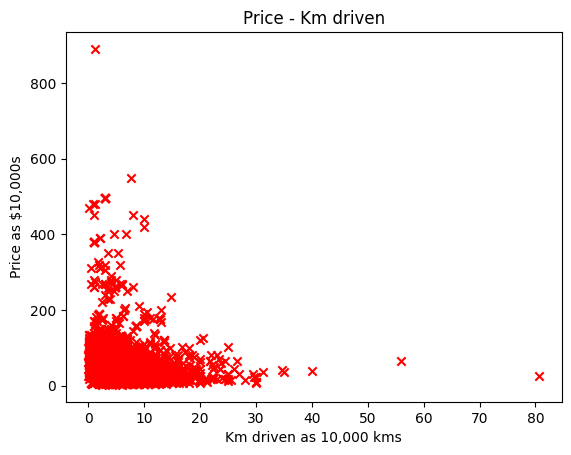

In [544]:
x_points = traindf["km_driven"] / 10000
y_points = traindf["selling_price"] / 10000
plt.title("Price - Km driven")
plt.ylabel("Price as $10,000s")
plt.xlabel("Km driven as 10,000 kms")
plt.scatter(x_points,y_points, marker="x", c="r")
plt.show()
# Remove point series
del x_points, y_points

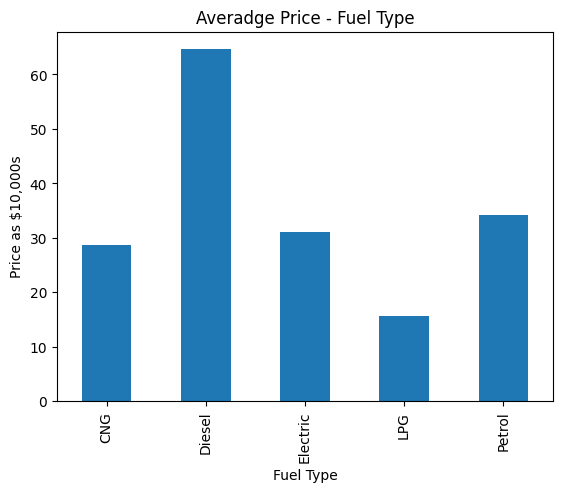

In [545]:
tmp_plot = traindf.groupby(["fuel"]).sum()["selling_price"] / traindf.groupby(["fuel"]).count()["selling_price"] / 10000
tmp_plot.plot.bar()
plt.ylabel("Price as $10,000s")
plt.xlabel("Fuel Type")
plt.title("Averadge Price - Fuel Type")
plt.show()
# Remove point series
del tmp_plot

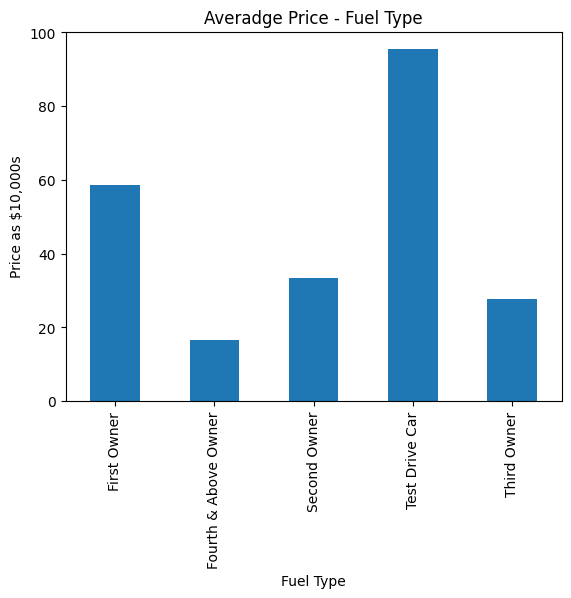

In [546]:
tmp_plot = traindf.groupby(["owner"]).sum()["selling_price"] / traindf.groupby(["owner"]).count()["selling_price"] / 10000
tmp_plot.plot.bar()
plt.ylabel("Price as $10,000s")
plt.xlabel("Fuel Type")
plt.title("Averadge Price - Fuel Type")
plt.show()
# Remove point series
del tmp_plot

And so on... 


Now on that case we need to represent 'object' types with numeric values; This may be not the best way to solve this question! 

In [547]:
# Creating arrays that are include unique values so types of each object
fuel_types = traindf["fuel"].unique()
seller_type_types = traindf["seller_type"].unique()
transmission_types = traindf["transmission"].unique()
owner_types = traindf["owner"].unique()
object_names = ["fuel", "seller_type", "transmission", "owner"]
objects_types= [fuel_types, seller_type_types, transmission_types, owner_types]

In [548]:
counter = 0
for obj in objects_types:
    for i in range(len(obj)):
        traindf.loc[traindf[object_names[counter]] == obj[i], object_names[counter]] = i+1
    counter += 1
print(traindf)

                                     name  year  selling_price  km_driven  \
868                 Hyundai i10 Magna 1.1  2008         150000      90000   
869               Hyundai Santro Xing GLS  2009         110000     120000   
870                Nissan Sunny Diesel XV  2013         450000      80000   
871                 Hyundai i20 1.2 Spotz  2017         400000      38000   
872               Hyundai Santro Xing GLS  2009         140000     120000   
...                                   ...   ...            ...        ...   
4335  Hyundai i20 Magna 1.4 CRDi (Diesel)  2014         409999      80000   
4336           Hyundai i20 Magna 1.4 CRDi  2014         409999      80000   
4337                  Maruti 800 AC BSIII  2009         110000      83000   
4338     Hyundai Creta 1.6 CRDi SX Option  2016         865000      90000   
4339                     Renault KWID RXT  2016         225000      40000   

     fuel seller_type transmission owner  
868     1           1           

We were represented objectswith numbers

Also we rescale selling_price , km_driven and year(not for now) (optional)

In [549]:
traindf['selling_price'] = round(traindf['selling_price'] / 10000, 1) # Write as ex 546.3 just one digit after point
traindf['km_driven'] = round(traindf['km_driven'] / 10000, 1) # Write as ex 546.3 just one digit after point

Multi variable Linear Regression

In [550]:
def f_wb (x, w, b): # Gets 2 vector (x, w) and 1 scaler (b)
    # Return a scaler
    return np.dot(x, w) + b

In [551]:
def cost_function (x, y, w, b): # Takes 3 vectors (x, y and w) and a scaler (b) 
    # Returns a scaler
    m = len(x)
    cost = np.sum((f_wb(x,w,b) - y)**2)
    return cost / (2*m)

In [552]:
def gradient_compute (x, y, w, b): # Takes 3 vectors (x, y and w) and a scaler (b)
    # Return one vector and one scaler
    m = len(x)
    dj_dw = np.dot((f_wb(x,w,b) - y), x) / m
    dj_db = np.sum(f_wb(x,w,b) - y) / m
    return dj_dw, dj_db

In [553]:
def gradient_descent (x, y, w, b, alpha = 0.01, iterations = None): # Takes 3 vectors (x, y and w) and two scaler (b and alpha)
    # Returns 2 scaler (best value of w and b)
    if iterations == None:
        change_rate = 0.001 * alpha # To control concavity
        c = 0
        while True:
            c += 1
            tmpw = w
            tmpb = b
            
            # Getting derivatives
            dj_dw, dj_db = gradient_compute(x, y, w, b)
            
            #Calculation
            tmpw -= alpha * dj_dw
            tmpb -= alpha * dj_db
            
            if tmpb / b < 1+change_rate and tmpb / b > 1- change_rate:
                if np.all(tmpw / w < 1+change_rate) and np.all(tmpw / w > 1- change_rate):
                    break
            
            w = tmpw
            b = tmpb
        print("Step:",c)
    else:
        for i in range(iterations):
            tmpw = w
            tmpb = b
            
            # Getting derivatives
            dj_dw, dj_db = gradient_compute(x, y, w, b)
            
            #Calculation
            tmpw -= alpha * dj_dw
            tmpb -= alpha * dj_db

            w = tmpw
            b = tmpb    
    
    return w, b

We created necessary functions for linear regression with multi features

Now we need to organize our dataset properly to find the best fititng line


In [554]:
x_train = traindf[['year', 'km_driven', 'fuel', 'seller_type','transmission', 'owner']].values
x_train = x_train.astype('float64')
y_train = traindf['selling_price']
print(x_train[0])

[2.008e+03 9.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00]


Time to find best w and b values

In [555]:
# We set the first w and b values as 0
initial_w = np.zeros(6) # We have 6 features so our w vector need to be 6 elements
initial_b = 0.0
bestw, bestb = gradient_descent(x_train, y_train, initial_w, initial_b, alpha=0.00000001, iterations=300)
print("bests",bestw, bestb)

bests [ 2.44759336e-02 -6.71506428e-05  3.88340795e-05  3.33102362e-05
  3.86042657e-05  1.74540119e-05] 1.201056225717527e-05


Now time to check is that value correct

In [556]:
# To do that we will sketch a cost functinos graph
print(cost_function(x_train, y_train, bestw, bestb))

1523.640014737689


In [557]:
def cost_iter_graph (x, y, w, b, num_iterations = 1000, alpha = 0.00000001): # x, y and w are vecors, b,num_iterations and alpha is scalers
    x_points = np.arange(num_iterations)
    y_points = np.zeros(num_iterations)
    
    for i in range(num_iterations):
        y_points[i] = cost_function(x, y, w, b)
        
        # Update w vector and b value
        # To do that we need to go one step further (alpha)
        dj_dw, dj_db = gradient_compute(x, y, w, b)
        w -= alpha * dj_dw 
        b -= alpha * dj_db 
    return x_points, y_points

0:   13279.29904730703
50:  1714.6186710502234
100: 1529.8927190701509
150: 1526.9406730611004
200: 1526.8921319327542
300: 1526.8885469020743
400: 1526.8857266491682
499: 1526.8829349067448


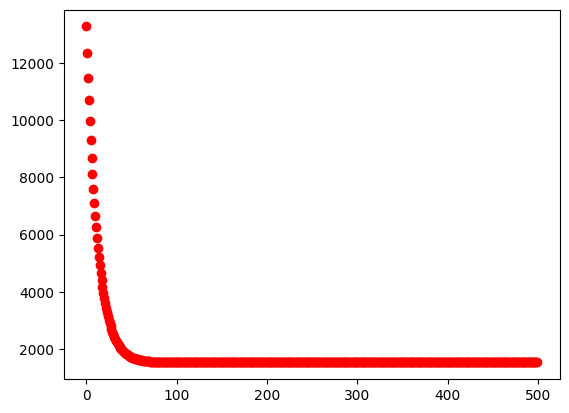

In [558]:
# We change the initial w 0.1 instead of 0 because it occures errors on cost function (should fixed)
initial_w = np.array([0.1,0.1,0.1,0.1,0.1,0.1])
x_points, y_points = cost_iter_graph(x_train, y_train, initial_w, initial_b, num_iterations=500, alpha=0.00000001)
# Some checkpoints with exact values
print("0:  ",y_points[0])
print("50: ",y_points[50])
print("100:",y_points[100])
print("150:",y_points[150])
print("200:",y_points[200])
print("300:",y_points[300])
print("400:",y_points[400])
print("499:",y_points[499])
plt.scatter(x_points, y_points, marker="o", c="r")

So our concavity is around 100 so we can decide our iteration number around 100. 

## Lets check it by using our test dataset

In [559]:
# Organize the test dataset to do processes 

# 1st- Checking null values
print(testdf.isna().sum())

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64


In [560]:
# 2nd- Check uniques are same 
def unique_check (arr1, arr2):
    try:
        print(arr1 == arr2)
    except ValueError:
        print("--------------------------")
        print("|These two are not equal:|")
        print(arr1)
        print(arr2)
        print("--------------------------")
unique_check(testdf["fuel"].unique(), fuel_types)
unique_check(testdf["seller_type"].unique(), seller_type_types)
unique_check(testdf["transmission"].unique(), transmission_types)
unique_check(testdf["owner"].unique(), owner_types)

--------------------------
|These two are not equal:|
['Petrol' 'Diesel' 'CNG' 'LPG']
['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
--------------------------
[ True  True  True]
[ True  True]
--------------------------
|These two are not equal:|
['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner']
['Third Owner' 'First Owner' 'Second Owner' 'Fourth & Above Owner'
 'Test Drive Car']
--------------------------


As we can observe there is no missing values but notice we have some different unique values that means our test and train datasets aren't seperated well :(. However, lets try to do withm that. On that point we have no 'Electric' fuel type on our test dataset, so it isn't a good think but it won't occure any problem while prediction (as my guess), on the other hand, test dataset have an extra owner type named as 'Test Drive Car', so we need to put this a one category that also exist on train dataset for example 'First Owner'. However, this will increase our error persantage. 

In [561]:
## Same as upper part (train data)
# Creating arrays that are include unique values so types of each object
test_fuel_types = testdf["fuel"].unique()
test_seller_type_types = testdf["seller_type"].unique()
test_transmission_types = testdf["transmission"].unique()
test_owner_types = testdf["owner"].unique()
test_object_names = ["fuel", "seller_type", "transmission", "owner"]
test_objects_types= [test_fuel_types, test_seller_type_types, test_transmission_types, test_owner_types]

counter = 0
for obj in test_objects_types:
    for i in range(len(obj)):
        testdf.loc[testdf[test_object_names[counter]] == obj[i], test_object_names[counter]] = i+1
    counter += 1
##
# Fixing the special values ('Test Drive Car' that is 4 now because of above code)
# We decided to do  'Test Drive Car' values 1 instead of 4
testdf.loc[testdf['owner'] == 4, 'owner'] = 1
print(testdf)

                            name  year  selling_price  km_driven fuel  \
0                  Maruti 800 AC  2007          60000      70000    1   
1       Maruti Wagon R LXI Minor  2007         135000      50000    1   
2           Hyundai Verna 1.6 SX  2012         600000     100000    2   
3         Datsun RediGO T Option  2017         250000      46000    1   
4          Honda Amaze VX i-DTEC  2014         450000     141000    2   
..                           ...   ...            ...        ...  ...   
863       Hyundai Accent GLE CNG  2009         160000      70000    3   
864  Maruti Zen Estilo LXI BSIII  2007         100000      80000    1   
865       Maruti Swift Dzire LDI  2014         390000     110000    2   
866        Hyundai i20 1.2 Spotz  2017         400000      50000    1   
867   Tata Tigor 1.2 Revotron XM  2018         509999       5000    1   

    seller_type transmission owner  
0             1            1     1  
1             1            1     1  
2           

In [562]:
# 3- Rescaling
testdf['selling_price'] = round(testdf['selling_price'] / 10000, 1) # Write as ex 546.3 just one digit after point
testdf['km_driven'] = round(testdf['km_driven'] / 10000, 1) # Write as ex 546.3 just one digit after point

Finally we are ready to try our prediction model :)))

In [563]:
x_test = testdf[['year', 'km_driven', 'fuel', 'seller_type','transmission', 'owner']].values
x_test = x_test.astype('float64')
y_test = testdf['selling_price']
print(x_train[0])

[2.008e+03 9.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00]


In [564]:
def predict (x, y, w, b): # gives 3 vectors(x,y,w) and 1 scalers (b) (these w and b values should be the best w and b (founded ones))
    # Return a vector that include error persantages
    prediction = f_wb(x, w, b)
    percantage = (abs(prediction - y) / y) * 100
    return percantage 
print("Closest percentage :",predict(x_test, y_test, bestw, bestb).min())
print("Farest percentage :", predict(x_test, y_test, bestw, bestb).max())
print("Averadge percentage :", predict(x_test, y_test, bestw, bestb).mean())

Closest percentage : 0.31601002514115856
Farest percentage : 1122.570545228092
Averadge percentage : 116.08027740095612


As You can see our error percentage is really high, so we can say that, our approch or our technique is not fitting for this dataset. On the next one we will use different techniques and approches to decrese this error percantage